<a href="https://colab.research.google.com/github/shreya200199/minorproject/blob/main/Minor_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install bing-image-downloader


In [2]:
!mkdir images


In [3]:
from bing_image_downloader import downloader
downloader.download("pretty sunflower",limit=30,output_dir="images",adult_filter_off = True)

[%] Downloading Images to /content/images/pretty sunflower


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://pixfeeds.com/images/flowers/sunflowers/1280-506587098-beautiful-sunflower.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://i.pinimg.com/originals/75/ad/3f/75ad3f4512a7cfd54b272a2e6ee73c46.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://i.pinimg.com/originals/28/64/0b/28640bb3517270d7670f2ad294ddd6ab.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://i.pinimg.com/originals/69/30/e0/6930e0d5364f2eead9591771a7515665.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://i.pinimg.com/originals/91/39/52/913952e8f81e8faa94481bda88e4dfba.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://i.pinimg.com/originals/46/1b/32/461b32b654b404395049c70f0a8b687d.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://i.pinimg.com/originals/99/85/f2/9985f23566590fd95cf6521

In [ ]:
downloader.download("rugby ball leather",limit=30,output_dir="images",adult_filter_off = True)



[!!]Indexing page: 1

[%] Indexed 11 Images on Page 1.


[%] Downloading Image #1 from https://www.cgstudio.com/imgd/l/76/58aaf6dca70248a0408b4567/rugby_ball_gilbert_01.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://static.vecteezy.com/system/resources/previews/000/436/969/original/vector-football-or-rugby-ball-emblem.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://historythings.com/wp-content/uploads/2016/02/footballls.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.allsportvintage.com/912-thickbox_default/vintage-leather-foot-ball.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://i.dailymail.co.uk/i/pix/2010/11/25/article-0-0C3BAC9D000005DC-814_634x796.jpg
[Error]Invalid image, not saving http://i.dailymail.co.uk/i/pix/2010/11/25/article-0-0C3BAC9D000005DC-814_634x796.jpg

[!] Issue getting: http://i.dailymail.co.uk/i/pix/2010/11/25/article-0-0C3BAC9D000005DC-814_634x796.jpg
[!] Error:: No active exception to rera

In [ ]:
downloader.download("ice cream cone",limit=30,output_dir="images",adult_filter_off = True)



[!!]Indexing page: 1

[%] Indexed 12 Images on Page 1.


[%] Downloading Image #1 from http://2.bp.blogspot.com/-RngYv3Fvoyk/T_9n9KUapaI/AAAAAAAAJFM/QdFXNq0eiz4/s1600/ice+cream+039.JPG
[%] File Downloaded !

[%] Downloading Image #2 from http://media.blogto.com/articles/20170419-hollywoodcone-15.jpg?width=1300&amp;quality=70
[%] File Downloaded !

[%] Downloading Image #3 from https://img1.etsystatic.com/072/0/6423019/il_570xN.819047879_hoel.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://media.techeblog.com/images/piglet-ice-cream.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://geekologie.com/2017/04/26/black-soft-serve-ice-cream-5.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://www.cool2bkids.com/wp-content/uploads/2017/11/Ice-Cream-Cone-Printable-Coloring-Pages-185x300.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://tattooblend.com/wp-content/uploads/2016/09/small-ice-cream-cone-tattoo.jpg
[%] File Downloaded !

[%

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR = '/content/images'
CATEGORIES = ['ice cream cone','pretty sunflower','rugby ball leather']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    #plt.imshow(img_array)
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]

svc = svm.SVC(probability= True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [ ]:
model = pickle.load(open('img_model.p','rb'))

Enter your URLhttps://images-na.ssl-images-amazon.com/images/I/71SSXB2U9bL._SL1485_.jpg
(1200, 1485, 3)
 PREDICTED OUTPUT: rugby ball leather


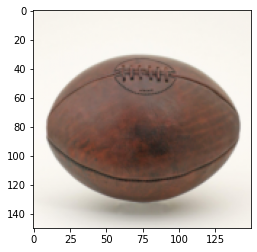

In [ ]:
flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT: {y_out}')

In [ ]:
!pip install streamlit

!pip install pyngrok==4.1.1
from pyngrok import ngrok

In [ ]:
%%writefile app.py
import streamlit as st
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import pickle 
from PIL import Image
st.set_option('deprecation.showfileUploaderEncoding', False)
st.title('Image Classifier using Machine Learning')
st.text('Upload the Image')

model = pickle.load(open('img_model.p','rb'))

uploaded_file = st.file_uploader("Choose an image...", type="jpg")
if uploaded_file is not None:
  img = Image.open(uploaded_file)
  st.image(img,caption='Uploaded Image')

  if st.button('PREDICT'):
    CATEGORIES = ['ice cream cone','pretty sunflower','rugby ball leather']
    st.write('Result...')
    flat_data=[]
    img = np.array(img)
    img_resized = resize(img,(150,150,3))
    flat_data.append(img_resized.flatten())
    flat_data = np.array(flat_data)
    y_out = model.predict(flat_data)
    y_out = CATEGORIES[y_out[0]]
    st.title(f' PREDICTED OUTPUT: {y_out}')
    q = model.predict_proba(flat_data)
    for index, item in enumerate(CATEGORIES):
      st.write(f'{item} : {q[0][index]*100}%')

Overwriting app.py


In [ ]:
!nohup streamlit run app.py &

url = ngrok.connect(port='8501')
url

nohup: appending output to 'nohup.out'


'http://7f59fbaceace.ngrok.io'